In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize 
%matplotlib inline

import automin.autodiff.variables as v
import automin.autodiff.AD_numpy as anp
import automin.autodiff.vector_variables as vv
import automin.optimizer as op
import automin.evaluate as evaluate


## demo cases

In [25]:
f1=lambda x, y : 100*(y-x**2)**2 + (1-x)**2

In [26]:
v0_list = [[-5,5], [5,5], [5,-5]]

In [27]:
models=['Conjugate Gradient','Steepest Descend','BFGS','Gradient Descend']

In [28]:
res={}
for model in models:
    res[model]=[op.minimize(f1,v0,method=model,max_iter=10000,lr=1e-6,sigma=1e-5) for v0 in v0_list]

C:\Users\Lenovo\Desktop\cs207_FinalProject\automin\optimizer.py:37: UserWarning: optimization did not converge
  warnings.warn("optimization did not converge")
C:\Users\Lenovo\Desktop\cs207_FinalProject\automin\optimizer.py:37: UserWarning: optimization did not converge
  warnings.warn("optimization did not converge")
C:\Users\Lenovo\Desktop\cs207_FinalProject\automin\optimizer.py:37: UserWarning: optimization did not converge
  warnings.warn("optimization did not converge")


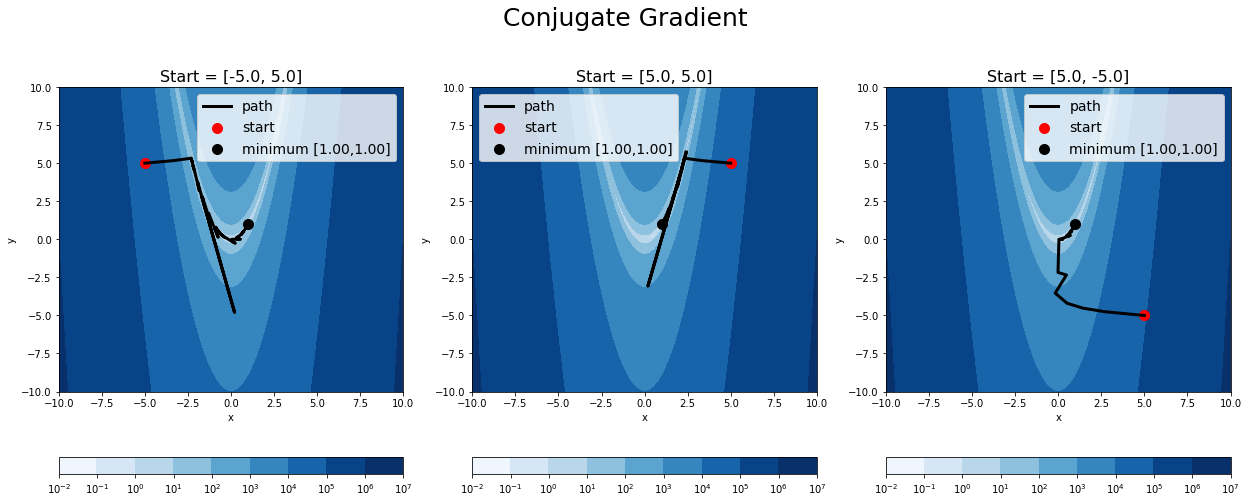

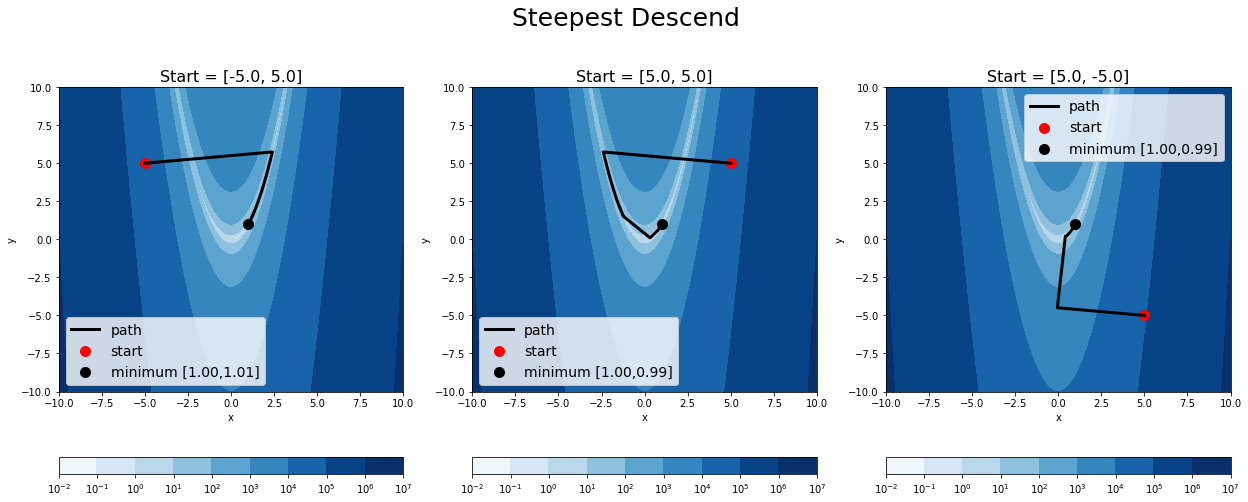

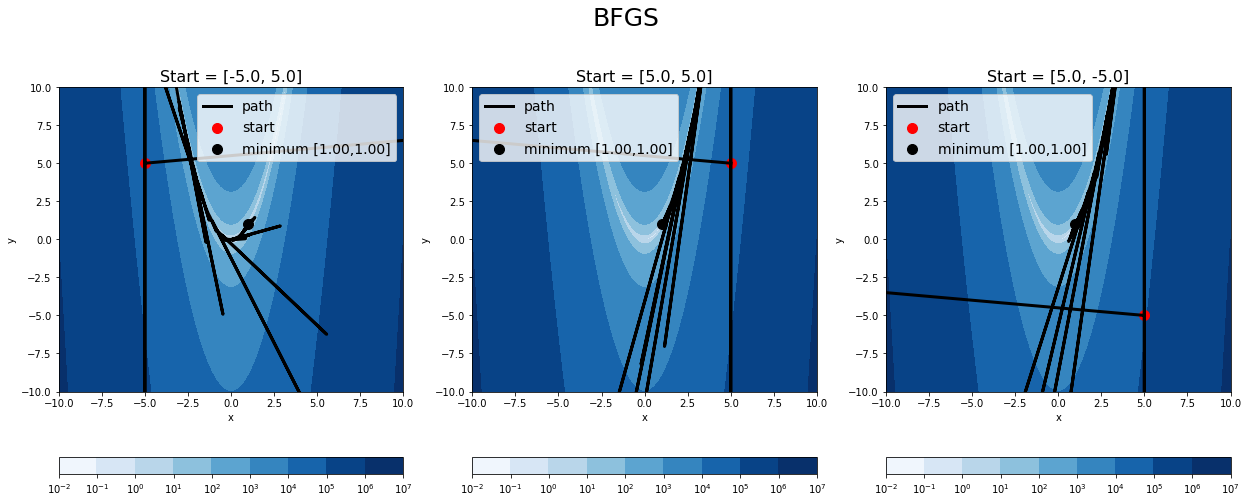

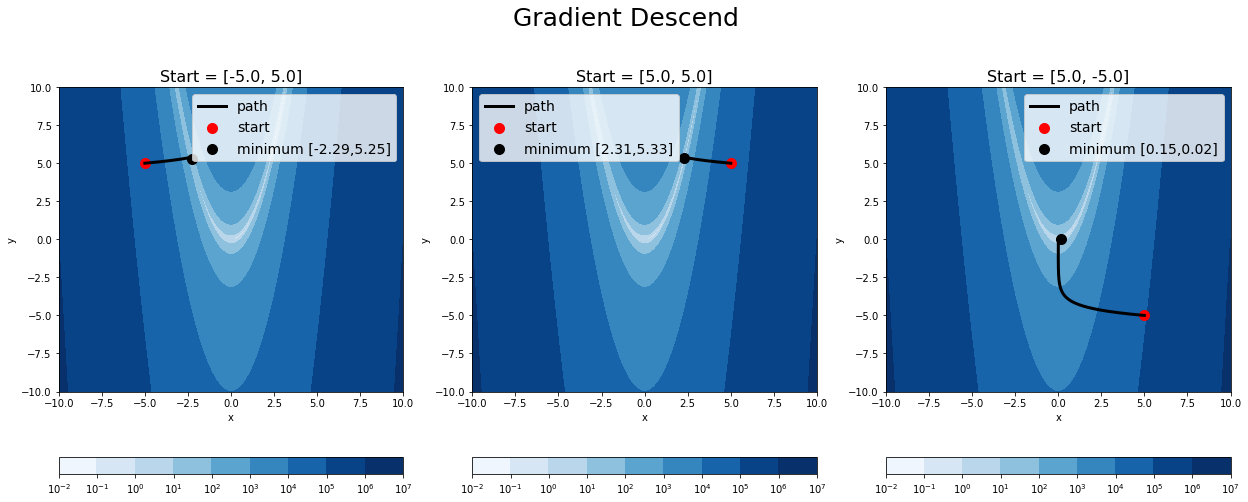

In [29]:
x_grid = np.linspace(-10, 10, 500)
y_grid = np.linspace(-10, 10, 500)
for model in models:
    evaluate.plot_path(f1, res[model], model, x_grid=x_grid, y_grid=y_grid)

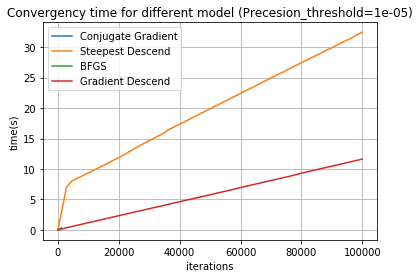

In [22]:
evaluate.plot_convergency([v[0].time_rec for k,v in res.items()],models)

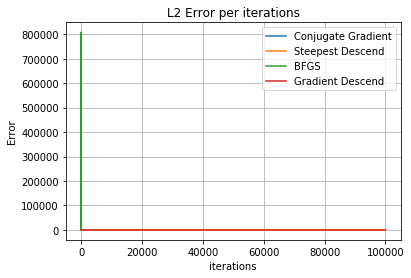

In [23]:
evaluate.plot_acc([v[0].val_rec for k,v in res.items()],[1,1],models)

In [146]:
def show_acc(val_lists,true,label_lists,norm='L2'):
    n = len(label_lists)

    if norm == 'L1':
        err = np.linalg.norm(np.array(val_lists)-np.array([1, 1]), 1, axis=-1)
    elif norm == 'L_inf':
        err = np.linalg.norm(np.array(val_lists) -
                             np.array([1, 1]), np.inf, axis=-1)
    else:
        err = np.linalg.norm(np.array(val_lists)-np.array([1, 1]), 2, axis=-1)
    for i,e in enumerate(err):
        print(norm+' error for {0:<20} is: {1:.2E}'.format(label_lists[i],e))

In [147]:
for model in ['BFGS','CG']:
    res['scipy_'+model]=[minimize(lambda x:f1(*x),v0,method=model) for v0 in v0_list]

In [148]:
val,labels=[],[]
for k,v in res.items():
    val.append(v[0].x)
    labels.append(k)
show_acc(val,[1,1],labels)

L2 error for Conjugate Gradient   is: 2.38E-03
L2 error for Steepest Descend     is: 1.04E+01
L2 error for BFGS                 is: 3.71E-06
L2 error for Gradient Descend     is: 1.03E+01
L2 error for scipy_BFGS           is: 1.00E-05
L2 error for scipy_CG             is: 5.08E-06
